# A. Importing, cleaning and numerical summaries

In [248]:
import pandas as pd

In [249]:
#import the data as a pandas DataFrame.
data = pd.read_csv("../data.csv")

In [250]:
#Check the number of observations, columns headings, data types, missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [251]:
#Obtain the column headings.
data.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [252]:
#If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
data.isnull().sum()


Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [253]:
data.dropna(inplace=True)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


In [255]:
#Obtain the mean, minimum and maximum value for each column containing numerical data.
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [256]:
#List the 10 happiest countries
data.sort_values(by="Happiness Rank").head(10)['Country']

0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

In [257]:
#List the 10 least happy countries.
data.sort_values(by="Happiness Rank").tail(10)['Country']

142                       Haiti
143                       Yemen
145                     Liberia
146                      Guinea
147                        Togo
148                      Rwanda
149                       Syria
150                    Tanzania
151                     Burundi
152    Central African Republic
Name: Country, dtype: object

# B. Indexing and grouping

Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions:
- North America
- Latin America
- Western Europe
- Eastern Europe
- Asia Pacific
- Africa


In [258]:
df = data.set_index('Region').copy()

In [259]:
#for example
df.loc['North America']

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,,
North America,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5
North America,United States,14,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,85.3


In [260]:
#Compute the mean happiness score for each region and rank the regions from most happy to least happy
df.groupby("Region")['Happiness Score'].mean().sort_values(ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.498952
Asia-Pacific      5.358326
Africa            4.254581
Europe            4.096000
Name: Happiness Score, dtype: float64

In [261]:
#Compute the number of countries in each region that have a happiness score above 6.0.
filt = df['Happiness Score']>6.0
df[filt].groupby("Region").size()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
dtype: int64

In [262]:
#Compute the difference between the maximum and minimum happiness score for each region. 
(df[filt].groupby("Region")['Happiness Score'].max()-df[filt].groupby("Region")['Happiness Score'].min()).sort_values()


Region
Eastern Europe    0.000
North America     0.323
Latin America     1.076
Western Europe    1.134
Asia-Pacific      1.230
Name: Happiness Score, dtype: float64

In [263]:
#Which region has the largest range of happiness scores?
(df[filt].groupby("Region")['Happiness Score'].max()-df[filt].groupby("Region")['Happiness Score'].min()).sort_values(ascending=False)

Region
Asia-Pacific      1.230
Western Europe    1.134
Latin America     1.076
North America     0.323
Eastern Europe    0.000
Name: Happiness Score, dtype: float64

# C. Bar plot of the Happiness Score

In [264]:
#Obtain a horizontal bar plot of the Happiness Score of the top 10 countries
df = df.set_index("Country").copy()
values = df[0:10]['Happiness Score']

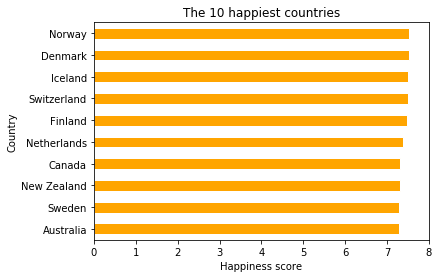

In [265]:
import matplotlib.pyplot as plt
%matplotlib inline
bar_plot=values.plot.barh(color = 'orange', edgecolor = 'white')
bar_plot.set_xlim(0,8)
bar_plot.set_title('The 10 happiest countries')
bar_plot.set_xlabel('Happiness score')
bar_plot.invert_yaxis()

In [266]:
stck = df.drop(["Happiness Rank", "Happiness Score", "Job Satisfaction"], axis=1)

In [267]:
values = stck[0:10]

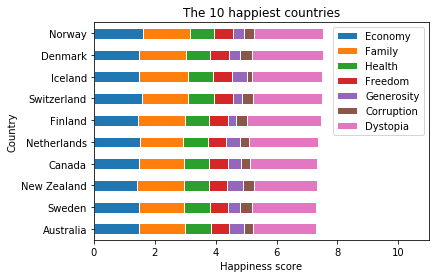

In [268]:
#modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score 
#is divided into the seven parts corresponding to the columns:
bar_plot=values.plot.barh(edgecolor = 'white', stacked=True)
bar_plot.set_xlim(0,11)
bar_plot.set_title('The 10 happiest countries')
bar_plot.set_xlabel('Happiness score')
bar_plot.invert_yaxis()

In [269]:
df = data.set_index("Region").copy()

In [270]:
#the top 10 countries from the region Africa
stck = df.loc['Africa'].drop(["Happiness Rank", "Happiness Score", "Job Satisfaction"], axis=1)

In [271]:
stck = stck.set_index("Country")

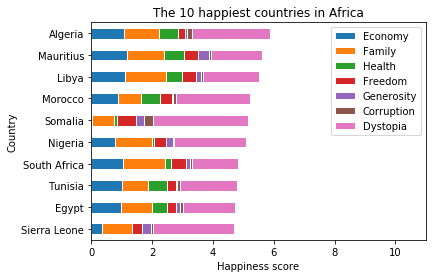

In [272]:
bar_plot=stck[:10].plot.barh(edgecolor = 'white', stacked=True)
bar_plot.set_xlim(0,11)
bar_plot.set_title('The 10 happiest countries in Africa')
bar_plot.set_xlabel('Happiness score')
bar_plot.invert_yaxis()

In [273]:
#data[data['Country'].str.contains("Poland")]

# D. Histogram of Job Satisfaction

(40, 100)

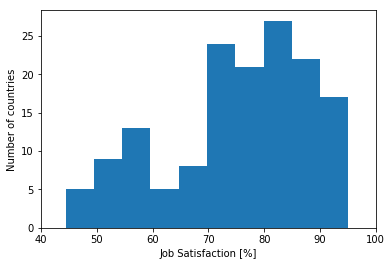

In [274]:
hist = data['Job Satisfaction'].plot.hist(bins=10)
hist.set_xlabel('Job Satisfaction [%]')
hist.set_ylabel('Number of countries')
hist.set_xlim(40,100)

# E. Pairwise Scatter plots

In [275]:
import seaborn as sns

In [276]:
corr = df.drop(["Country", "Happiness Rank"], axis=1)

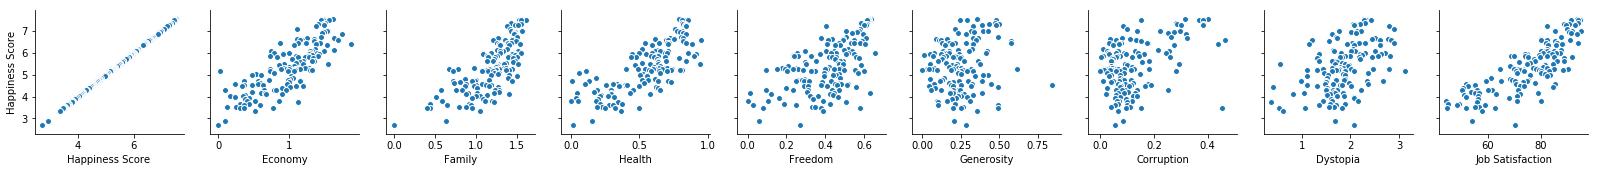

In [277]:
#scatter plots of the Happiness Score versus each of the other variable
sns.pairplot(corr, y_vars=["Happiness Score"], x_vars=list(corr.columns))

# F. Correlation

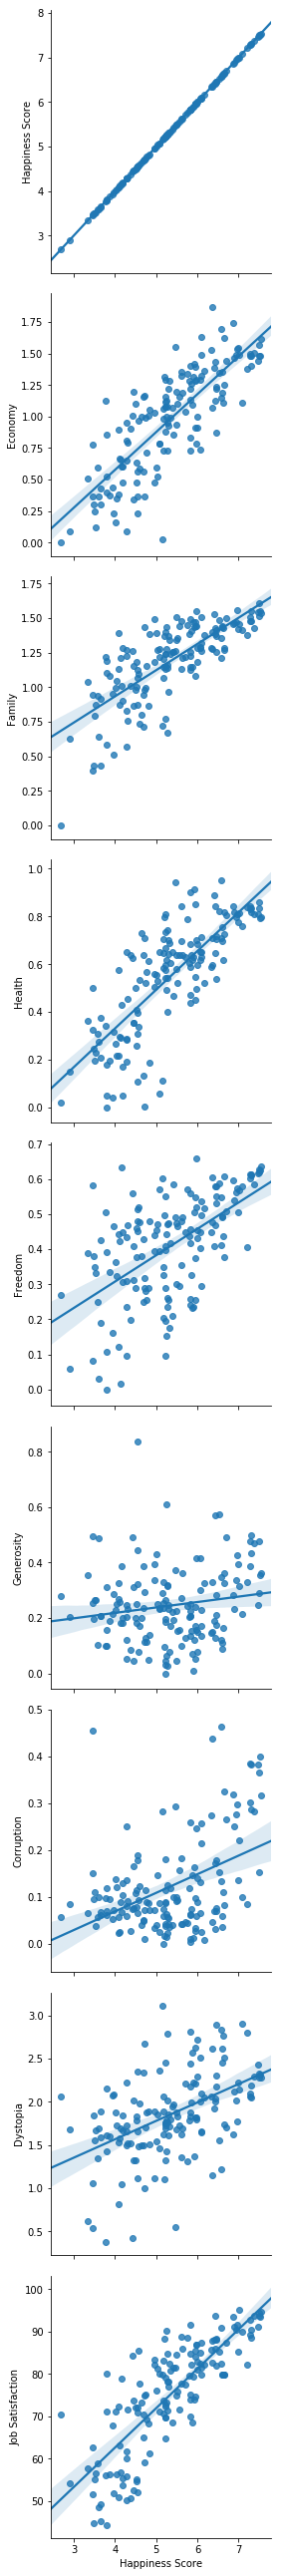

In [278]:
#Obtain the correlation between the Happiness Score and each of the other variables. 
#Which variable has the highest correlation with the Happiness Score?
sns.pairplot(corr, x_vars=["Happiness Score"], y_vars=list(corr.columns), kind='reg', size=4)

Which variable has the highest correlation with the Happiness Score?
- Economy
- Job satisfaction

# G. Probabilities

Probability that randomly selected country with Happiness score over 6.0 is from Western Europe. 

In [279]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,,
Western Europe,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6
Western Europe,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5
Western Europe,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5
Western Europe,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7
Western Europe,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2


In [280]:
df.groupby("Region").size()

Region
Africa            43
Asia-Pacific      43
Eastern Europe    21
Europe             1
Latin America     22
North America      2
Western Europe    19
dtype: int64

In [281]:
#number of entries from Western Europe = 19, also:
N_W = len(df.loc["Western Europe"])

In [282]:
filt = df['Happiness Score']>6

In [283]:
#number of countries with score >6
N_all = len(df[filt])

In [284]:
#probability that randomly selected country with Happiness score over 6.0
#is from Western Europe. 
N_W/N_all

0.4318181818181818

In [286]:
#TEST
filt = data['Happiness Score']>6

In [287]:
region = data[filt]['Region']

In [288]:
#test experiment
import random

outcome_space = region
experiments = 10000
success = 0
for i in range(experiments):
    result = outcome_space[random.randrange(len(outcome_space))]
    if result=='Western Europe':
        success += 1

success / experiments


0.3759

# H. Matrices
define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [289]:
data.head(3)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe


In [290]:
reg = data['Region']
mat = pd.DataFrame({'Country': list(data["Country"]), 'Region': list(data["Region"])})

In [291]:
mat.head(2)

,Country,Region
0,Norway,Western Europe
1,Denmark,Western Europe


In [292]:
mat['count'] = 1

In [293]:
mat.head(2)

,Country,Region,count
0,Norway,Western Europe,1
1,Denmark,Western Europe,1


In [294]:
new = mat.pivot_table(values='count', index='Country', columns='Region')

In [295]:
new.head()

Region,Africa,Asia-Pacific,Eastern Europe,Europe,Latin America,North America,Western Europe
Country,,,,,,,
Afghanistan,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Algeria,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Angola,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [296]:
new.fillna(value=0, inplace=True)

In [297]:
new.head(2)

Region,Africa,Asia-Pacific,Eastern Europe,Europe,Latin America,North America,Western Europe
Country,,,,,,,
Afghanistan,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,1.0,0.0,0.0,0.0,0.0
